In [ ]:
!nvidia-smi

Thu Oct 17 08:10:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 124MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 93.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 67.7ms
Speed: 11.6ms preprocess, 67.7ms inference, 700.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


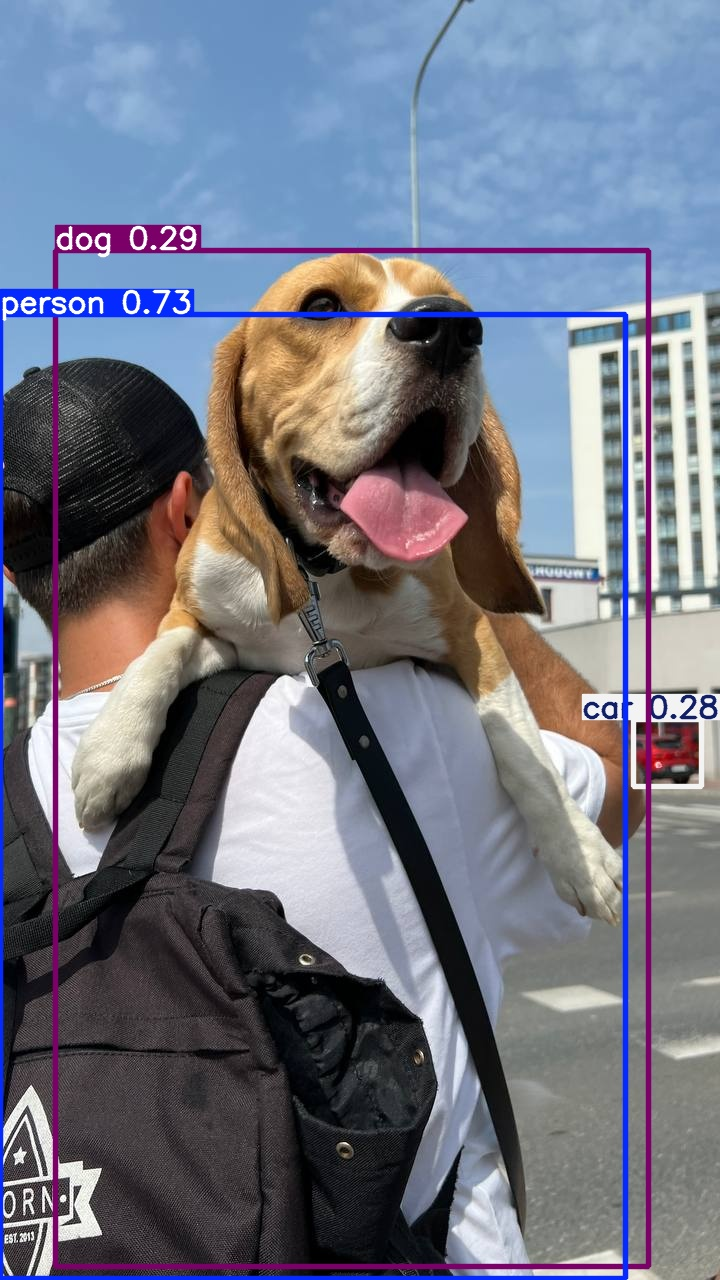

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 47.9ms
Speed: 2.8ms preprocess, 47.9ms inference, 557.3ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!unzip '/content/data.zip'

Archive:  /content/data.zip
   creating: Apple Sorting.v6-damagedapples_raw-images.yolov11/
  inflating: Apple Sorting.v6-damagedapples_raw-images.yolov11/data.yaml  
  inflating: Apple Sorting.v6-damagedapples_raw-images.yolov11/README.dataset.txt  
  inflating: Apple Sorting.v6-damagedapples_raw-images.yolov11/README.roboflow.txt  
   creating: Apple Sorting.v6-damagedapples_raw-images.yolov11/test/
   creating: Apple Sorting.v6-damagedapples_raw-images.yolov11/test/images/
  inflating: Apple Sorting.v6-damagedapples_raw-images.yolov11/test/images/apple--106-_jpg.rf.5d4cdc6f5bd48667c045a43a5fb3d970.jpg  
  inflating: Apple Sorting.v6-damagedapples_raw-images.yolov11/test/images/apple--119-_jpg.rf.d7b946189406fa5cb1f936ba2edcfa11.jpg  
  inflating: Apple Sorting.v6-damagedapples_raw-images.yolov11/test/images/apple--132-_jpg.rf.b38cfb540837f6de31bee356952362ca.jpg  
  inflating: Apple Sorting.v6-damagedapples_raw-images.yolov11/test/images/apple--178-_jpg.rf.4ca4da2d5e684cd9636f098763

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data='/content/dataset/data.yaml' epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


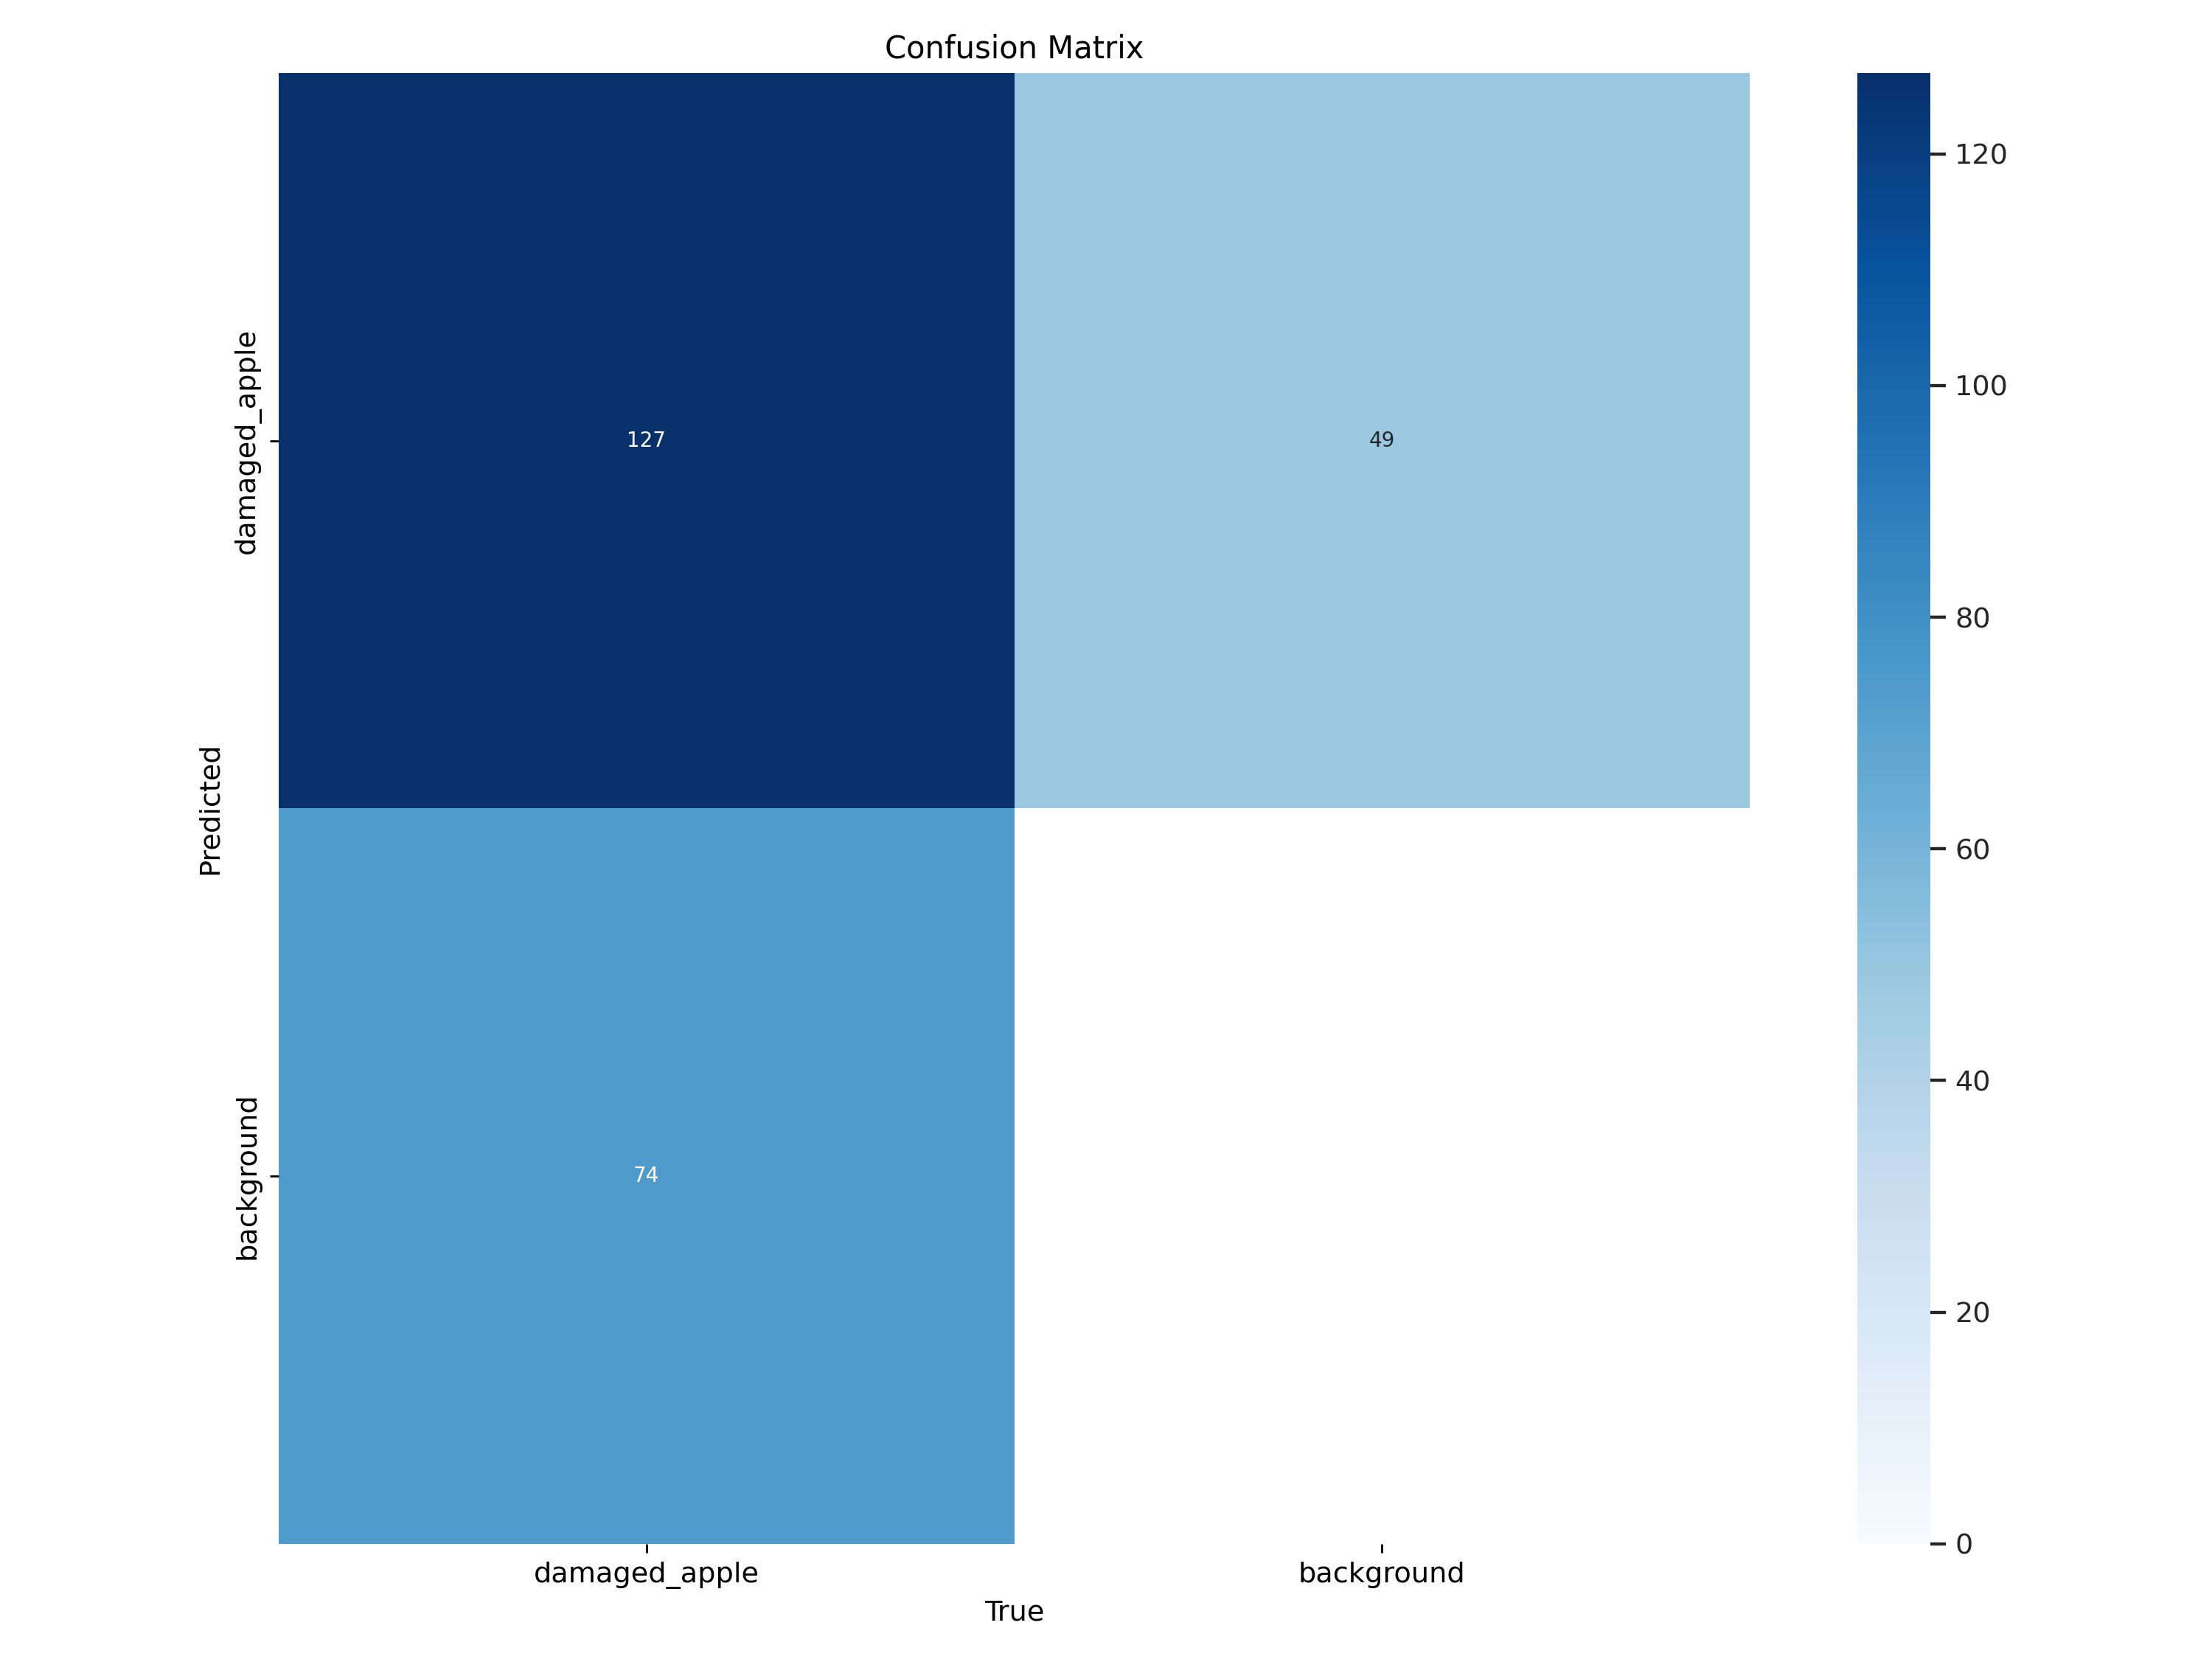

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content


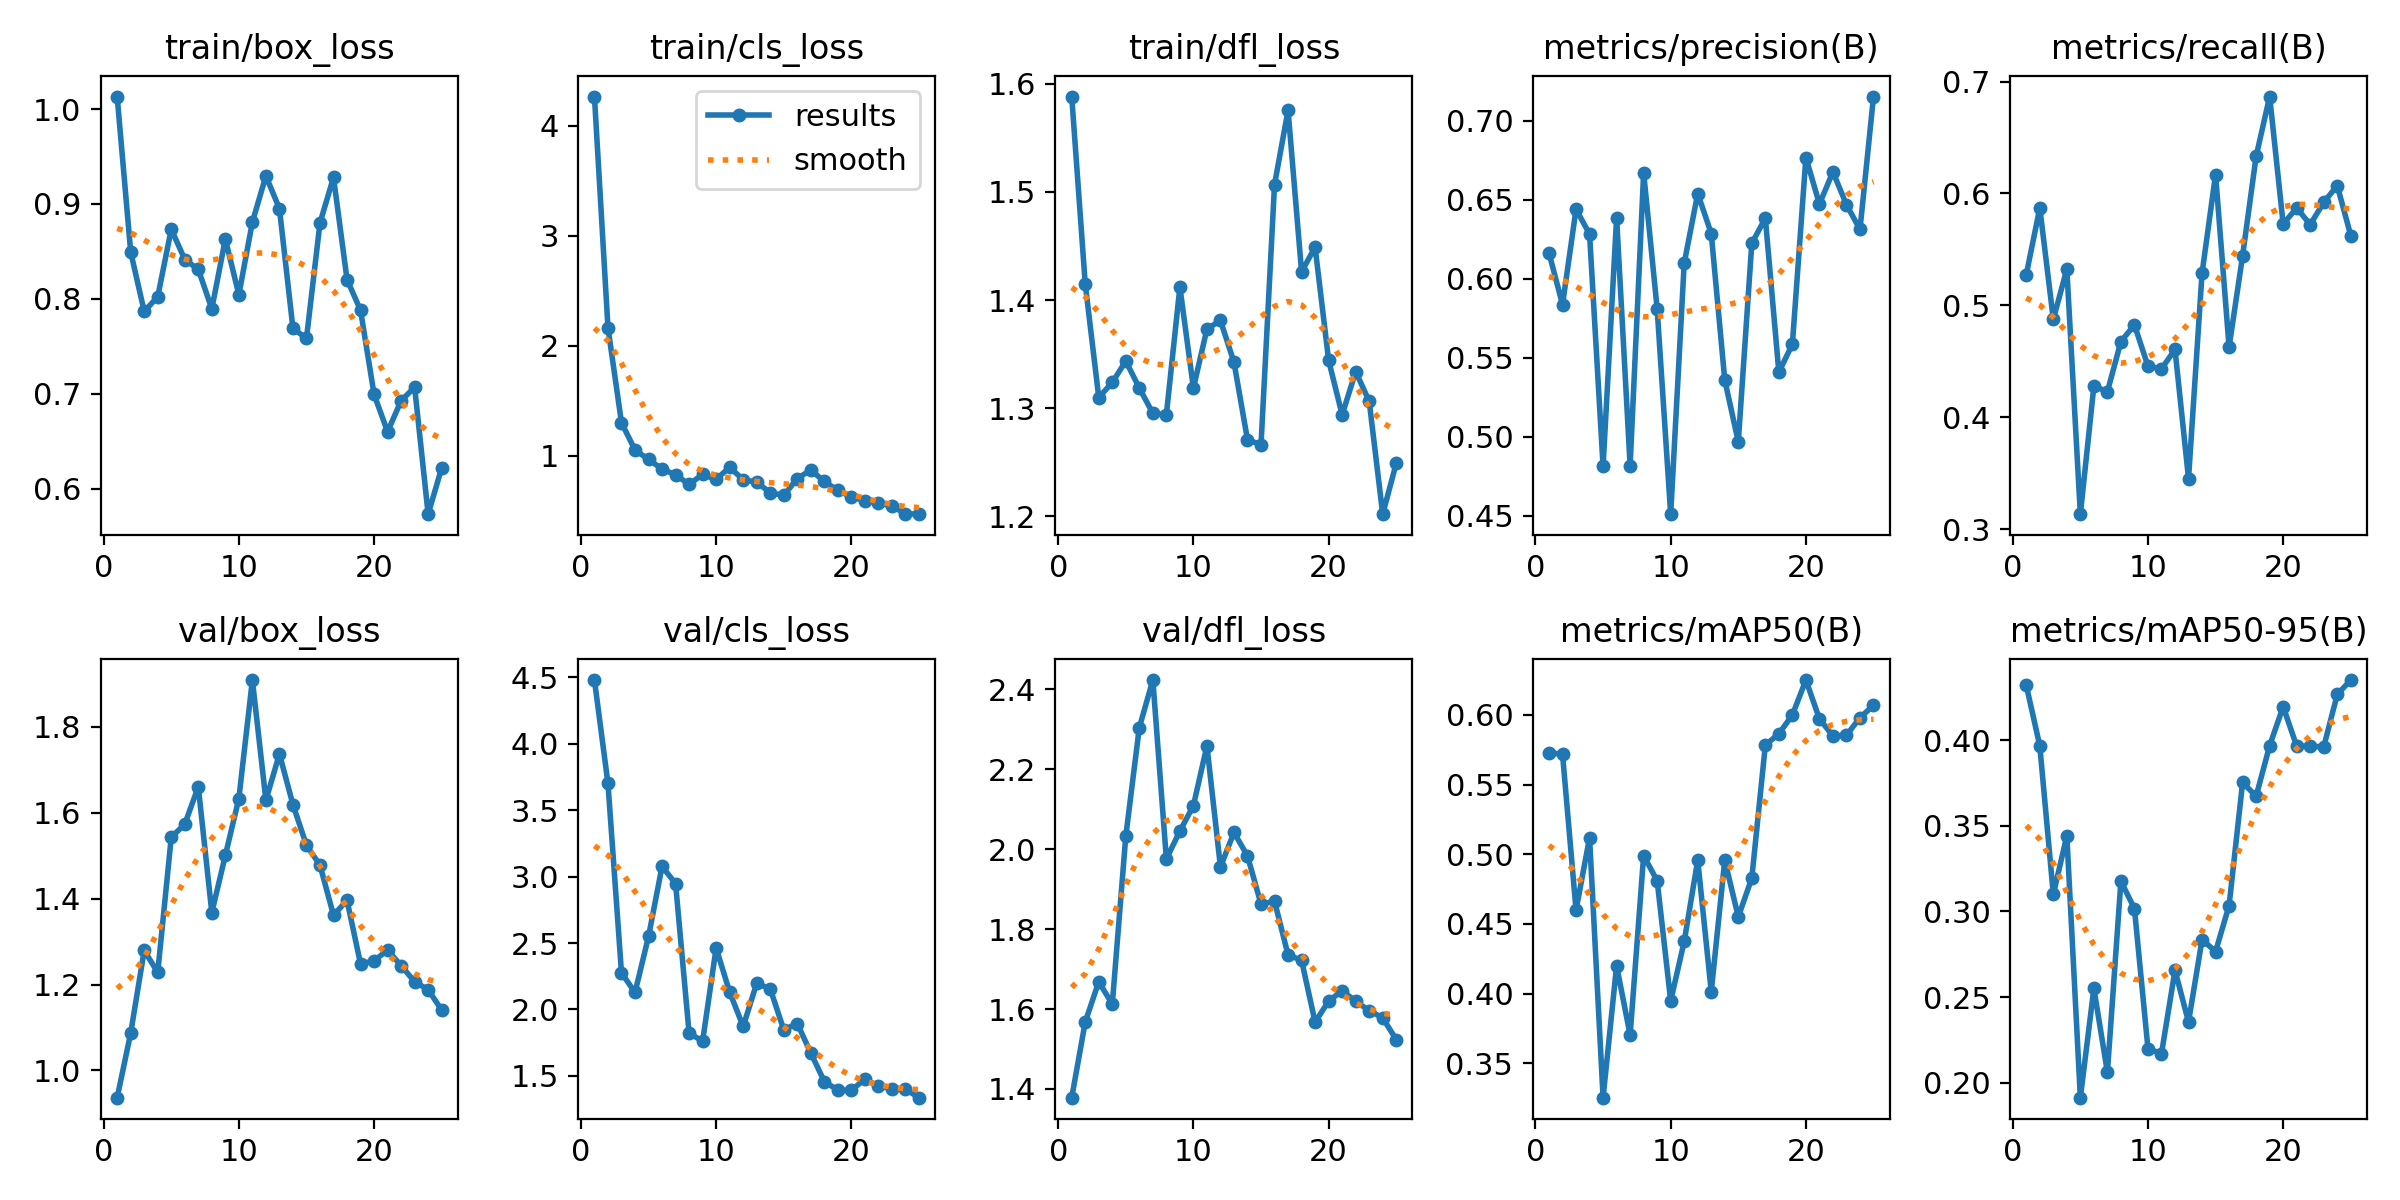

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


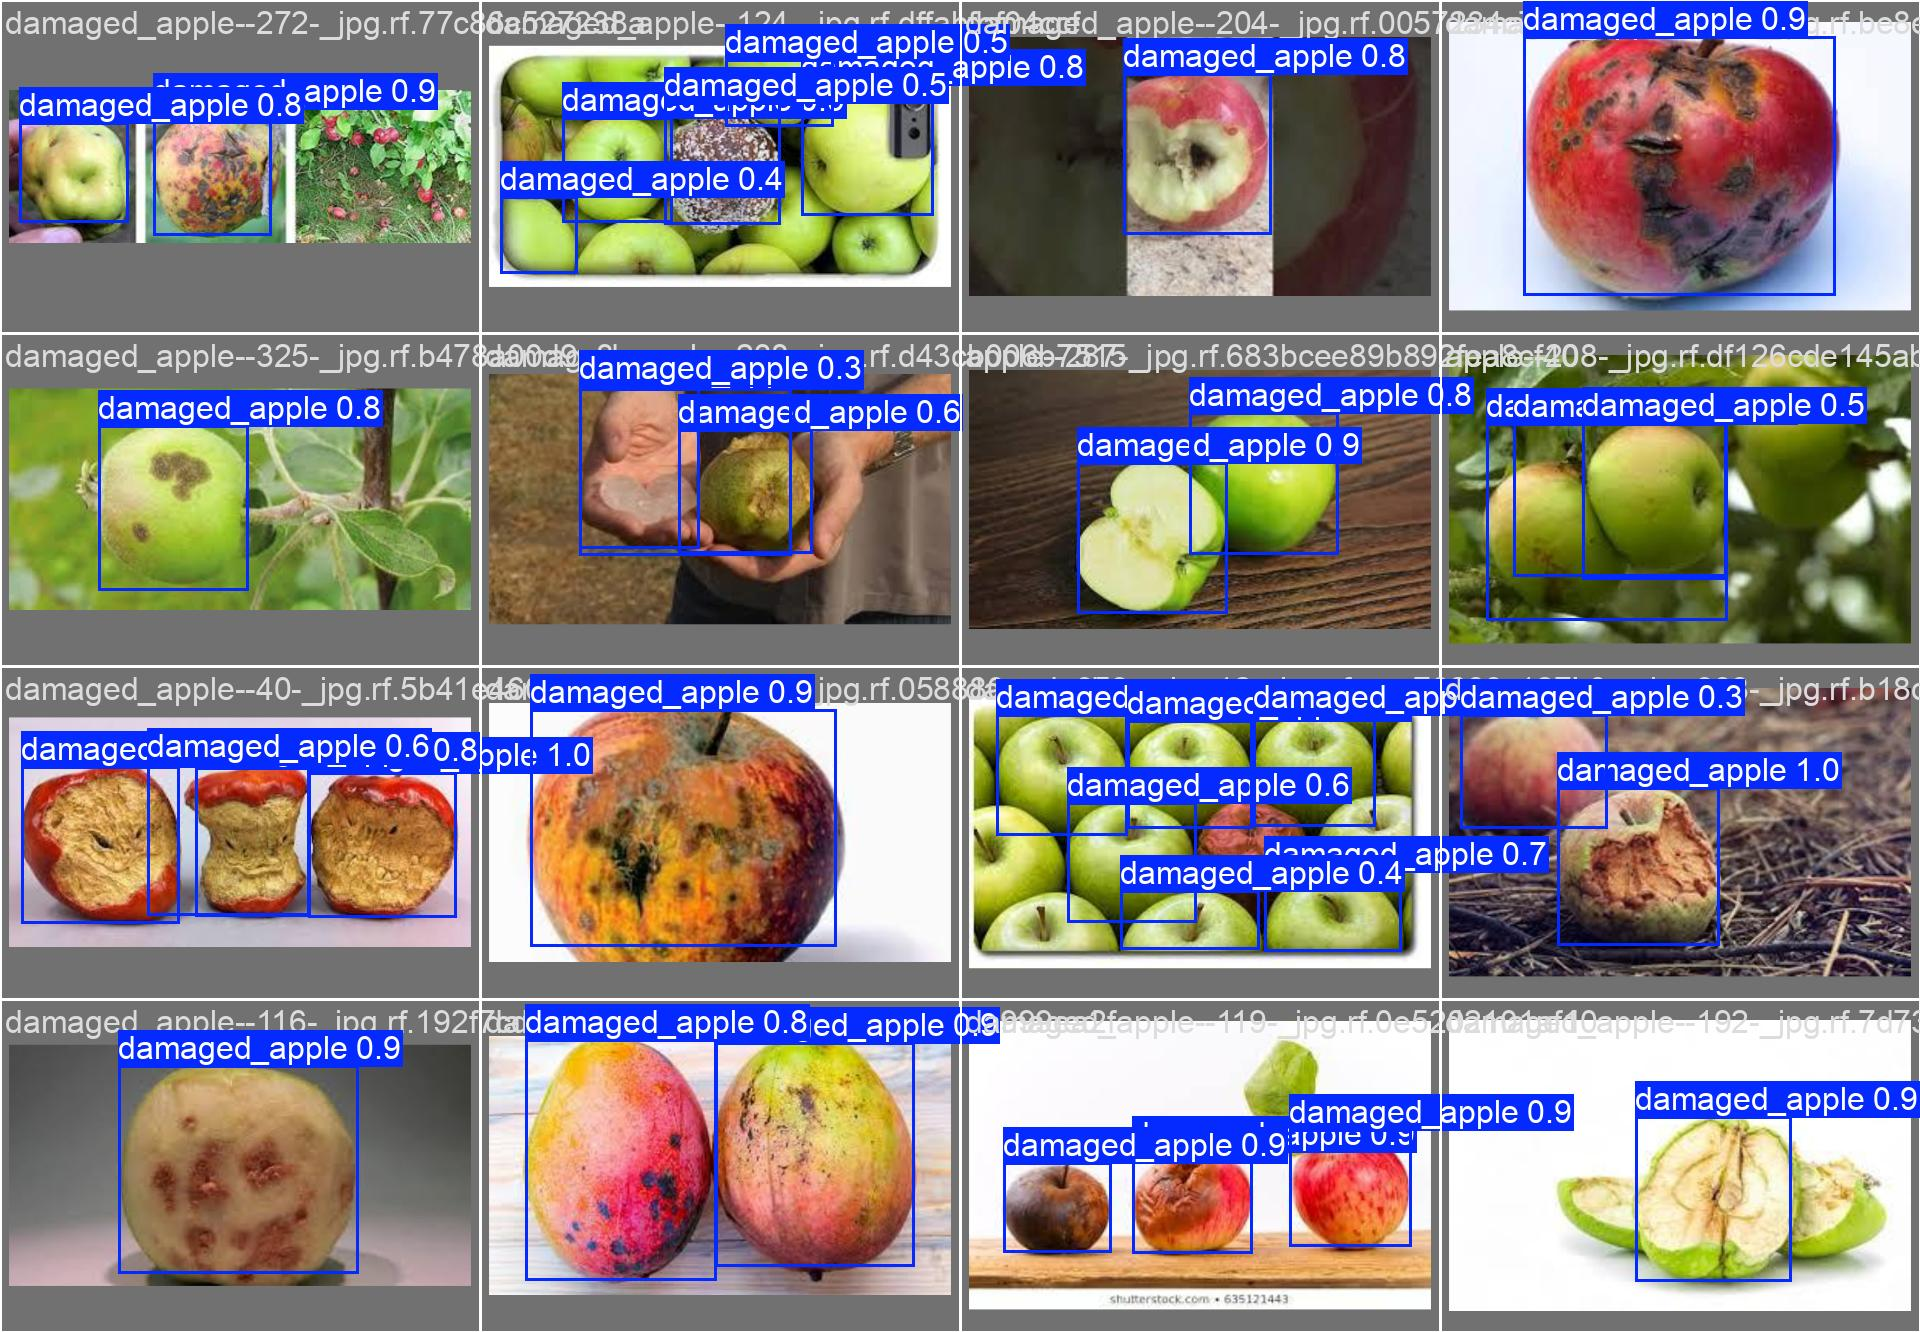

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data='/content/dataset/data.yaml'

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/dataset/valid/labels.cache... 103 images, 0 backgrounds, 0 corrupt: 100% 103/103 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.50it/s]
                   all        103        201      0.658      0.577      0.606      0.436
Speed: 10.3ms preprocess, 14.2ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source='/content/dataset/test/images' save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/5 /content/dataset/test/images/apple--106-_jpg.rf.5d4cdc6f5bd48667c045a43a5fb3d970.jpg: 544x800 4 damaged_apples, 41.4ms
image 2/5 /content/dataset/test/images/apple--119-_jpg.rf.d7b946189406fa5cb1f936ba2edcfa11.jpg: 416x800 1 damaged_apple, 38.7ms
image 3/5 /content/dataset/test/images/apple--132-_jpg.rf.b38cfb540837f6de31bee356952362ca.jpg: 608x800 2 damaged_apples, 36.4ms
image 4/5 /content/dataset/test/images/apple--178-_jpg.rf.4ca4da2d5e684cd9636f0987633bcf31.jpg: 576x800 1 damaged_apple, 36.7ms
image 5/5 /content/dataset/test/images/apple--179-_jpg.rf.d2a7634cf17537da52c08c32c1fb0172.jpg: 800x544 4 damaged_apples, 37.2ms
Speed: 3.3ms preprocess, 38.1ms inference, 128.6ms postprocess per image at shape (1, 3, 800, 544)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytic

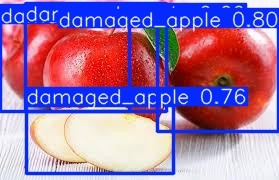

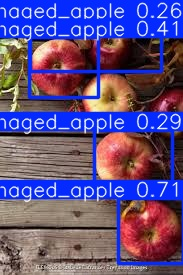

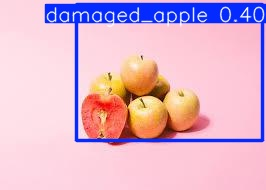

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")